In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten 

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(len(X_train))
print(len(X_test))

60000
10000


In [ ]:
X_train = X_train / 255
X_test = X_test / 255

5

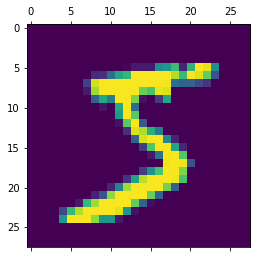

In [ ]:
plt.matshow(X_train[0])
y_train[0]

In [ ]:
from tensorflow.keras.utils import to_categorical
X_train_flattened = X_train.reshape(X_train.shape[0], 28,28,1)
X_test_flattened = X_test.reshape(X_test.shape[0], 28,28,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1618 - accuracy: 0.9513
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0545 - accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0360 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0257 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0170 - accuracy: 0.9951


In [ ]:
y_predicted = model.predict(X_test_flattened)
np.argmax(y_predicted[0])

7

In [ ]:
def result(a):
  y_predicted = model.predict(X_test_flattened)
  print(np.argmax(y_predicted[a]))
  #get_xaxis().set_visible(False)
  plt.matshow(X_test[a])

3


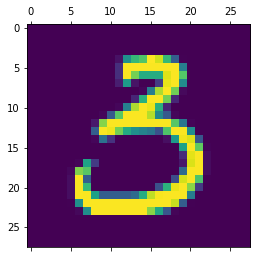

In [ ]:
result(343)